# Library

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
import joblib
from skimage.feature import hog
from sklearn import datasets, metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Dataset

In [2]:
mnist = fetch_openml('mnist_784')
print(mnist.keys())
mnist.data.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


(70000, 784)

In [3]:
X, y = mnist['data'], mnist['target']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (70000, 784)
y shape: (70000,)


In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


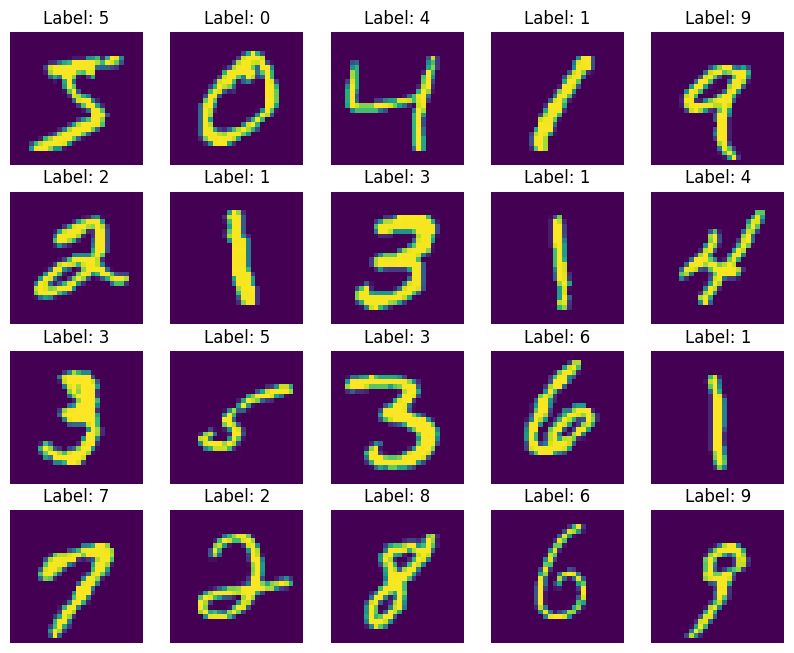

In [5]:
plt.figure(figsize=(10, 10))
for i in range(20):
  plt.subplot(5, 5, i+1)
  data = X.iloc[i, 0:]
  plt.title("Label: {}".format(y[i]))
  plt.imshow(data.values.reshape(28, 28))
  plt.axis("off")
plt.show()

# Data Preprocessing

In [6]:
kelas = np.unique(y)
kelas = np.sort(kelas)
y = y.astype(np.uint8)
X = np.array(X, 'int16')
y = np.array(y, 'int')
list_hog = []
for x in X:
  hog_ = hog(x.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=False)
  list_hog.append(hog_)
X_hog = np.array(list_hog, 'float64')
X_hog.shape

(70000, 36)

# Support Vector Machine

In [7]:
svm_model = SVC(kernel="rbf")
svm_model.fit(X_hog, y)
y_pred = svm_model.predict(X_hog)
accuracy_svm = metrics.accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy_svm}')

Accuracy: 0.9273571428571429


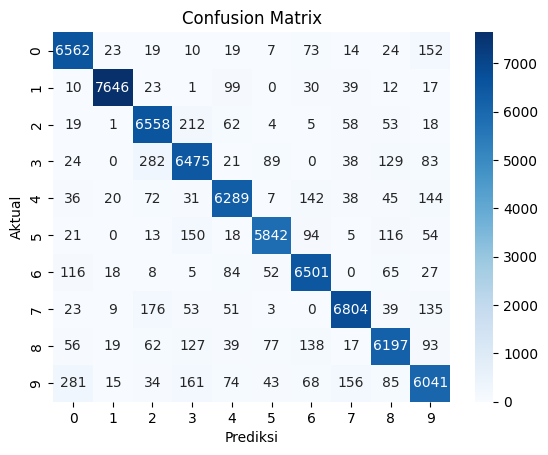

In [8]:
cm = metrics.confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=kelas, yticklabels=kelas)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Artificial Neural Network

In [34]:
y_ = to_categorical(y)
ann_model = keras.Sequential([
  keras.layers.Input(shape=(36,)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(len(kelas), activation='softmax')
])
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='accuracy', patience=5)
ann_model.fit(X_hog, y_, epochs=50, batch_size=32, callbacks=[early_stopping_callback])

Epoch 1/50
2188/2188 [==============================] - 11s 4ms/step - loss: 0.6285 - accuracy: 0.7910
Epoch 2/50
2188/2188 [==============================] - 10s 4ms/step - loss: 0.4000 - accuracy: 0.8690
Epoch 3/50
2188/2188 [==============================] - 9s 4ms/step - loss: 0.3645 - accuracy: 0.8796
Epoch 4/50
2188/2188 [==============================] - 9s 4ms/step - loss: 0.3463 - accuracy: 0.8863
Epoch 5/50
2188/2188 [==============================] - 10s 4ms/step - loss: 0.3287 - accuracy: 0.8909
Epoch 6/50
2188/2188 [==============================] - 9s 4ms/step - loss: 0.3168 - accuracy: 0.8955
Epoch 7/50
2188/2188 [==============================] - 10s 5ms/step - loss: 0.3081 - accuracy: 0.8979
Epoch 8/50
2188/2188 [==============================] - 10s 5ms/step - loss: 0.3003 - accuracy: 0.9005
Epoch 9/50
2188/2188 [==============================] - 10s 4ms/step - loss: 0.2934 - accuracy: 0.9020
Epoch 10/50
2188/2188 [==============================] - 8s 4ms/step - loss:

In [35]:
y_pred = ann_model.predict(X_hog)
accuracy_ann = metrics.accuracy_score(y, np.argmax(y_pred, axis=1))
print(f'Accuracy: {accuracy_ann}')

2188/2188 [==============================] - 4s 2ms/step
Accuracy: 0.9411857142857143


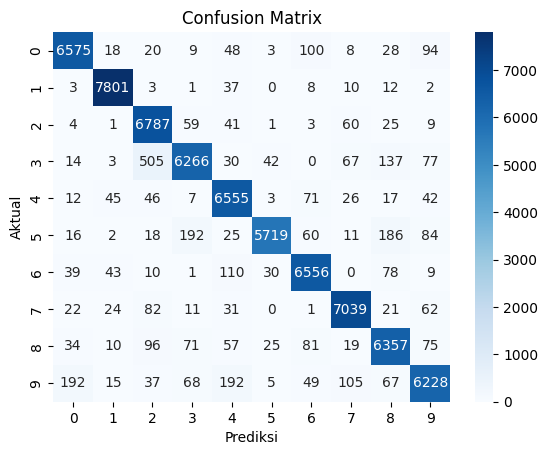

In [36]:
cm = metrics.confusion_matrix(y, np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=kelas, yticklabels=kelas)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Deteksi Tulisan Tangan

1/1 [==============================] - 0s 38ms/step


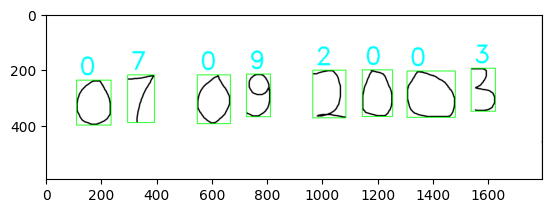

In [69]:
def ob_pred(img, model):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
  ret, img_th = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY_INV)
  ctrs, _ = cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  rects = [cv2.boundingRect(ctr) for ctr in ctrs]
  for rect in rects:
    cv2.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 2)
    img_bob = img_th[rect[1]-10:rect[1]+rect[3]+10, rect[0]-10:rect[0]+rect[2]+10]
    roi = cv2.resize(img_bob, (28, 28), img_th, interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3,3))
    roi_hog = hog(roi, orientations=9, pixels_per_cell=(14,14), cells_per_block=(1,1), visualize=False)
    nbr = model.predict(np.array([roi_hog], 'float64'))
    cv2.putText(img, str(int(np.argmax(nbr[0]))), (rect[0] + 10, rect[1] - 20), cv2.FONT_HERSHEY_DUPLEX, 3, (0, 255, 255), 3)
  plt.imshow(img)

img = cv2.imread("drive/MyDrive/testt.png")
ob_pred(img, ann_model)

1/1 [==============================] - 0s 25ms/step


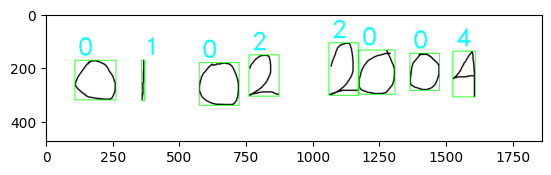

In [70]:
img = cv2.imread("drive/MyDrive/mft22.png")
ob_pred(img, ann_model)

1/1 [==============================] - 0s 94ms/step


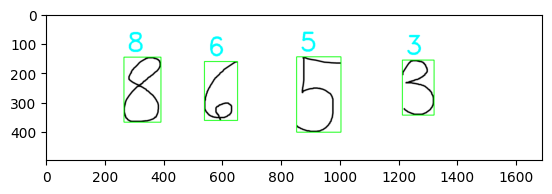

In [80]:
img = cv2.imread("drive/MyDrive/sst.png")
ob_pred(img, ann_model)

'07092003'

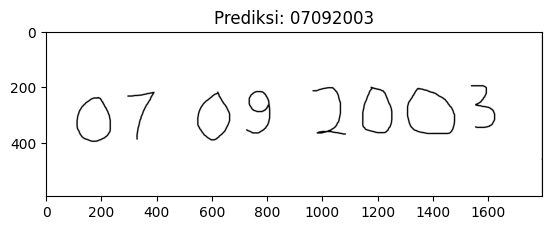

In [88]:
def simple_ocr(image, model):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
  ret, img_th = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY_INV)
  ctrs, _ = cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  rects = [cv2.boundingRect(ctr) for ctr in ctrs]
  clas = []
  boxx = []
  for rect in rects:
    img_bob = img_th[rect[1]-10:rect[1]+rect[3]+10, rect[0]-10:rect[0]+rect[2]+10]
    roi = cv2.resize(img_bob, (28, 28), img_th, interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3,3))
    roi_hog = hog(roi, orientations=9, pixels_per_cell=(14,14), cells_per_block=(1,1), visualize=False)
    nbr = model.predict(np.array([roi_hog], 'float64'), verbose=0)
    clas.append(str(np.argmax(nbr[0])))
    boxx.append(rect[0])
  boxx_sort = sorted(boxx)
  sorted_clas = [x for _, x in sorted(zip(boxx, clas))]
  kelas = ''.join(sorted_clas)
  plt.title("Prediksi: "+kelas)
  plt.imshow(image)
  return kelas

img = cv2.imread("drive/MyDrive/testt.png")
simple_ocr(img, ann_model)

'01022004'

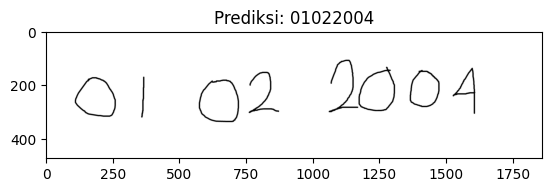

In [89]:
img = cv2.imread("drive/MyDrive/mft22.png")
simple_ocr(img, ann_model)

'8653'

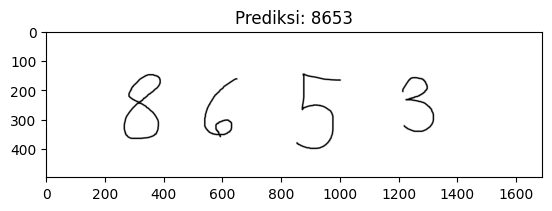

In [90]:
img = cv2.imread("drive/MyDrive/sst.png")
simple_ocr(img, ann_model)